# OCR Demo

In [46]:
import sys

import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import pytesseract

plt.rcParams["figure.figsize"] = [38.4/2.54, 21.6/2.54]

In [7]:
print("Python:", sys.version, sys.version.split(" ")[0]=="3.10.4")
print("cv2:", cv2.__version__, cv2.__version__=="4.7.0")
print("pytesseract:", pytesseract.__version__, pytesseract.__version__=="0.3.10")


Python: 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)] True
cv2: 4.7.0 True
pytesseract: 0.3.10 True


In [9]:
# configure tesseract executable
pytesseract.pytesseract.tesseract_cmd = "D:/Documents/Tesseract-OCR/tesseract.exe"
print(pytesseract.get_languages())

['chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'eng', 'osd']


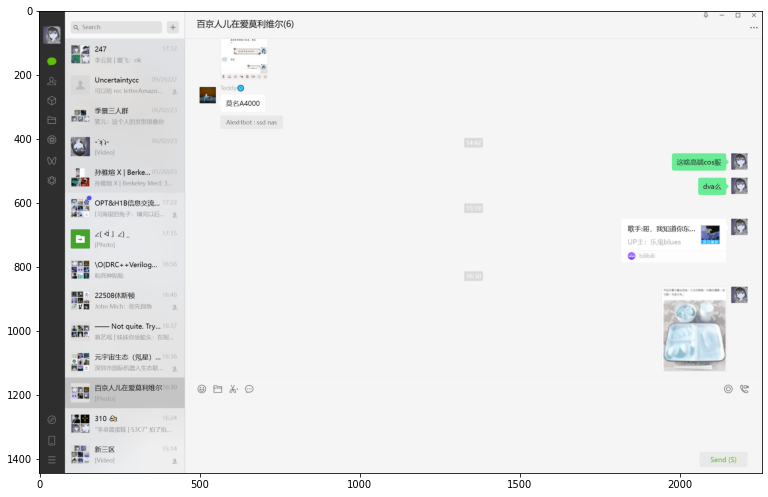

In [86]:
img = cv2.imread("view.png")

plt.imshow(img)

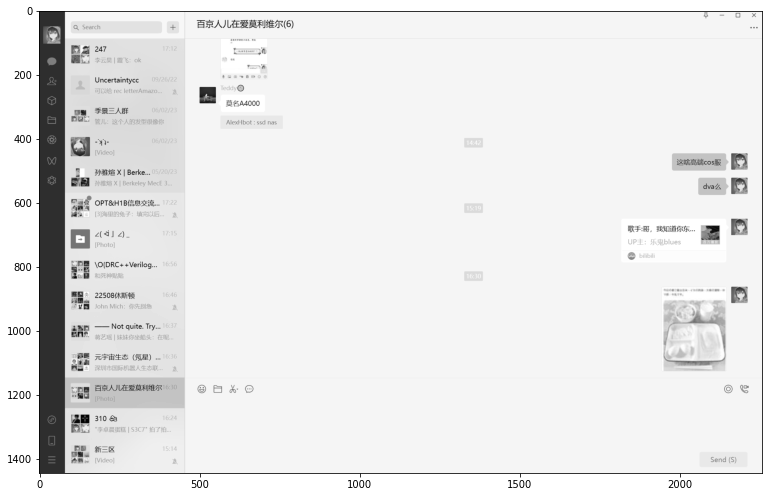

In [87]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap="gray")

149.0


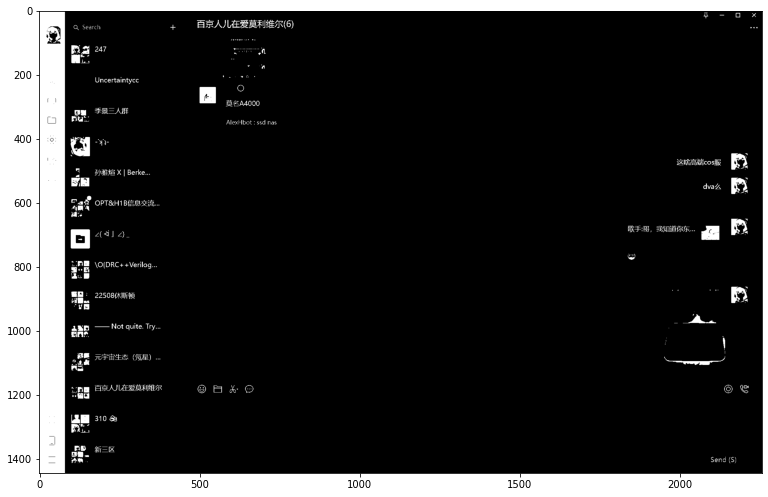

In [88]:
ret, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

print(ret)
plt.imshow(img_thresh, cmap="gray")

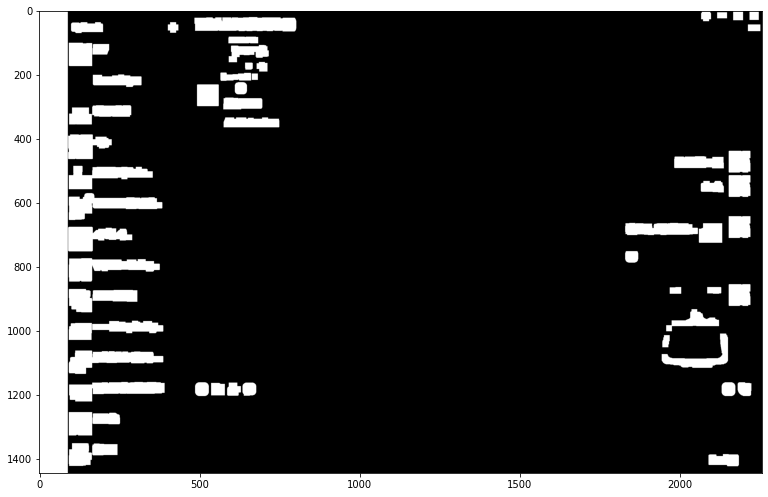

In [89]:

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# Applying dilation on the threshold image
img_dilation = cv2.dilate(img_thresh, rect_kernel, iterations = 1)

plt.imshow(img_dilation, cmap="gray")

60


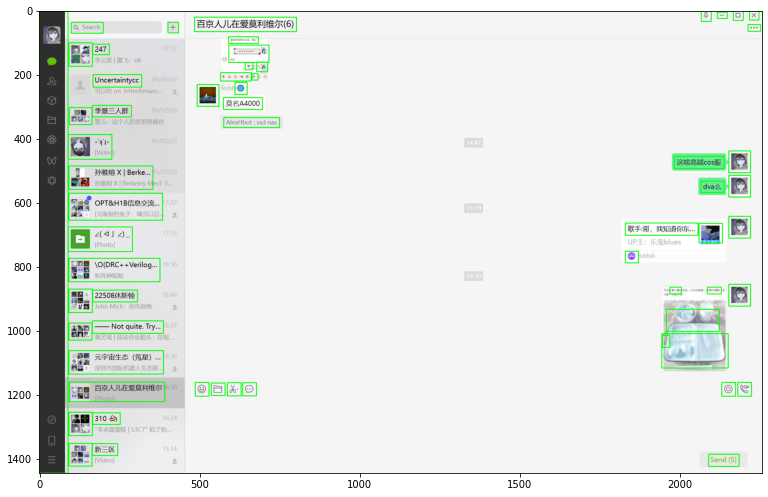

In [90]:
# Finding contours
contours, hierarchy = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

print(len(contours))

img_annotated = img.copy()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    
    rect = cv2.rectangle(img_annotated, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img_annotated, cmap="gray")

Recognized 0/60: 	Send (S)


Recognized 1/60: 	
Recognized 2/60: 	
Recognized 3/60: 	310 令


Recognized 4/60: 	
Recognized 5/60: 	
Recognized 6/60: 	
Recognized 7/60: 	
Recognized 8/60: 	
Recognized 9/60: 	
Recognized 10/60: 	
Recognized 11/60: 	所相国 “百京人儿在爱莫利维尔
病辐


Recognized 12/60: 	
Recognized 13/60: 	
Recognized 14/60: 	
Recognized 15/60: 	
Recognized 16/60: 	一一Not quite. Try…


Recognized 17/60: 	
Recognized 18/60: 	22508休斯顿


Recognized 19/60: 	
Recognized 20/60: 	
Recognized 21/60: 	
Recognized 22/60: 	
Recognized 23/60: 	NO{DRC+ +Verilog.…


Recognized 24/60: 	
Recognized 25/60: 	(后
[Photol]

Recognized 26/60: 	
Recognized 27/60: 	
Recognized 28/60: 	
Recognized 29/60: 	回击埋 opT&H1B信息交流.。


Recognized 30/60: 	dva么


Recognized 31/60: 	
Recognized 32/60: 	孙雅迷 X | Berke.…


Recognized 33/60: 	cos服

，

这只高

这


Recognized 34/60: 	
Recognized 35/60: 	
Recognized 36/60: 	AlexHbot : ssd nas


Recognized 37/60: 	
Recognized 38/60: 	季景三人群


Recognized 39/60: 	莫名A4000


Recognized 40/60:

True

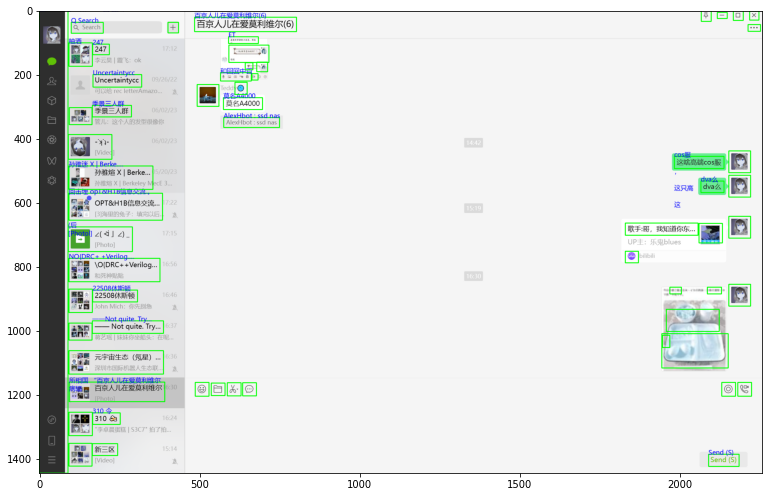

In [91]:

img_annotated = img.copy()

for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    
    rect = cv2.rectangle(img_annotated, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    cropped = img_annotated[y:y + h, x:x + w]
    text = pytesseract.image_to_string(cropped, lang="chi_sim")
    
    print("Recognized {0}/{1}: \t{2}".format(i, len(contours), text))
    
    fontpath = "./msyh.ttc" # <== 这里是宋体路径 
    font = ImageFont.truetype(fontpath, 20)
    img_pil = Image.fromarray(img_annotated)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - 20),  text, font=font, fill=(0, 0, 255))
    img_annotated = np.array(img_pil)

plt.imshow(img_annotated, cmap="gray")

cv2.imwrite("annotated.png", img_annotated)
